In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, cross_val_predict
from collections import OrderedDict
import matplotlib.pyplot as plt
%matplotlib inline

from stock_system import IQFeed, DataUtils, ModelUtils, GridUtils, PlotUtils

In [30]:
# get stock data from db as dataframe
reload(DataUtils)
db = DataUtils.DataUtils()
# df = db.read_symbol_data("Select * from symbols where symbol='FB' limit 100") # Dummy data
df = db.read_symbol_data('SPY', 'd')
# run expinential smoothing
df = db.run_exp_smooth(df, alpha=.5)
# run technical analysis, add columns
df = db.run_techicals(df)
# Imput - fillna with 0 for now...
df = df.fillna(0)
# get y data as a function of last n bars (can vary)
# - could generate this as a param:
# - - time period:  daily, 5 minute, estimators_w_grid_dict
df['target'] = (df.close.pct_change(1) >= 0).astype(int)
# Drop the last row?
df = df[:-1]
# fit, predict
cols = ['roc', 'sto', 'macd', 'willr', 'rsi']
X = df[cols].values
y = df['target'].values

In [32]:
rf = RandomForestClassifier(
       n_estimators=500,
       max_depth=None,
       min_samples_leaf=10,
       max_features='log2',
       oob_score=True
   )

# Fit, train, and predit the model
all_scores = m.predict_tscv(rf, X_train, y_train)
print '====== Cross Val Mean Scores ======'
for key in all_scores[0].keys():
    mean_val = np.mean([d[key] for d in all_scores])
    print '- %s: %s' % (key, mean_val)

===== Fitting model split 1 =====
train, test size:  406, 404
- rmse:  0.344690993773
precision_score  =  0.877118644068
recall_score  =  0.91592920354
accuracy_score  =  0.881188118812
roc_auc_score  =  0.876503927613
mean_squared_error  =  0.118811881188
r2_score  =  0.517947698121
f1_score  =  0.896103896104
             precision    recall  f1-score   support

          0       0.89      0.84      0.86       178
          1       0.88      0.92      0.90       226

avg / total       0.88      0.88      0.88       404

              Actual
        ------------------
        | 207 | 29 |
Predict ------------------
        | 19 | 149 |
        ------------------
===== Fitting model split 2 =====
train, test size:  810, 404
- rmse:  0.32624476021
precision_score  =  0.906666666667
recall_score  =  0.902654867257
accuracy_score  =  0.893564356436
roc_auc_score  =  0.892338669583
mean_squared_error  =  0.106435643564
r2_score  =  0.568161479566
f1_score  =  0.90465631929
             pre

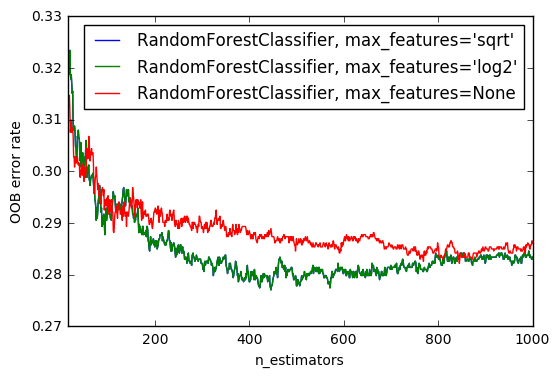

In [8]:
reload(PlotUtils)
PlotUtils.plot_oob_error(X, y)

In [19]:
# rf.predict_proba(X_test)[:,1]

In [20]:
reload(PlotUtils)
probabilities = rf.predict_proba(X_test)[:,1]
# probabilities

In [21]:
# y_test

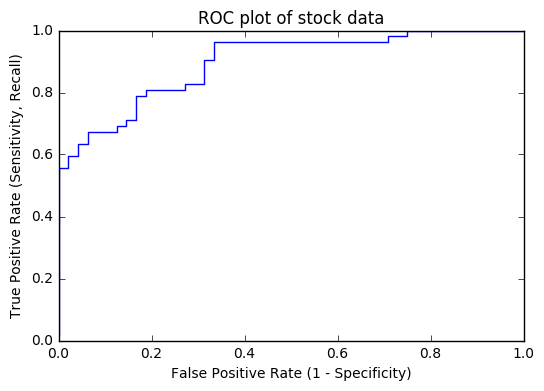

In [22]:
PlotUtils.plot_roc_curve(probabilities, y_test)

#     plt.plot(fpr, tpr)
#     plt.xlabel("False Positive Rate (1 - Specificity)")
#     plt.ylabel("True Positive Rate (Sensitivity, Recall)")
#     plt.title("ROC plot of fake data")
#     plt.show()

In [34]:
np.sort(probabilities)

array([ 0.1174308 ,  0.12690753,  0.12989709,  0.12989709,  0.12989709,
        0.12989709,  0.13118163,  0.13238477,  0.15848936,  0.16388782,
        0.16845336,  0.18429483,  0.20335244,  0.20589986,  0.21156963,
        0.21284891,  0.21426321,  0.21589261,  0.22551718,  0.2397409 ,
        0.28620305,  0.29077554,  0.31273387,  0.32865025,  0.33277567,
        0.33608802,  0.34471494,  0.34728693,  0.34735122,  0.35401608,
        0.35645855,  0.35684903,  0.3578418 ,  0.37138142,  0.37934444,
        0.38801427,  0.38971674,  0.39810397,  0.42135277,  0.42415022,
        0.43390771,  0.47060968,  0.48766142,  0.49261326,  0.49475706,
        0.49716584,  0.50223628,  0.50442374,  0.5149941 ,  0.51966258,
        0.54305489,  0.54446157,  0.54650713,  0.55363187,  0.55768678,
        0.57218327,  0.5799417 ,  0.5823973 ,  0.59827821,  0.62866016,
        0.62974441,  0.64014917,  0.6415928 ,  0.64414766,  0.65432691,
        0.65517155,  0.65905619,  0.65914317,  0.66010852,  0.68

In [24]:
reload(PlotUtils)
tpr, fpr, thresholds = PlotUtils.roc_curve(probabilities, y_test)
# fpr, tpr

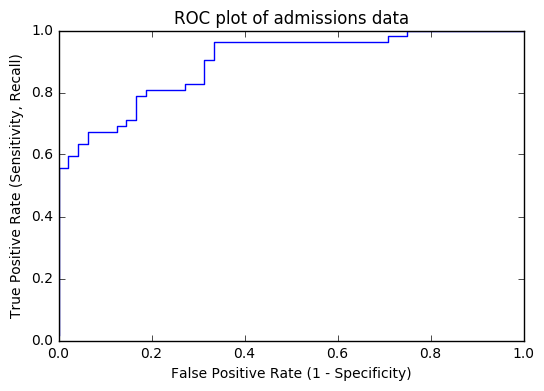

In [25]:
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of admissions data")
plt.show()

TypeError: invalid type promotion

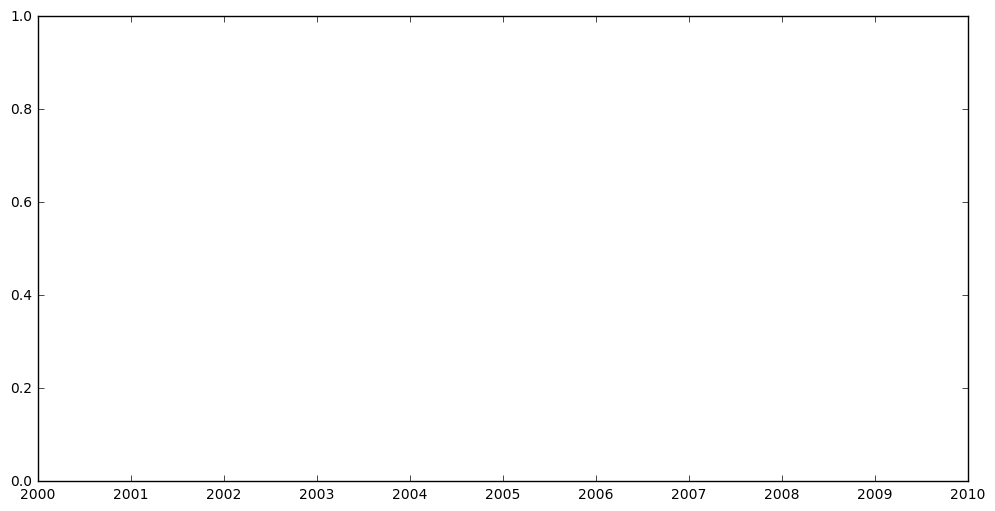

In [27]:
PlotUtils.plot_ts_chart(df['close'],df['date'])